# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [61]:
# Memuat Dataset Hasil Clustering
data = pd.read_csv("Dataset_klasifikasi.csv")
data.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,ClusterKMeans
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,1
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,3
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,2
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,3
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,0


In [62]:
# Menampilkan Informasi Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
 9   ClusterKMeans        2512 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 196.4+ KB


In [63]:
# Mengecek Missing Value pada Dataset
data.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0
ClusterKMeans,0


**Exploratory Data Analysis (EDA)**

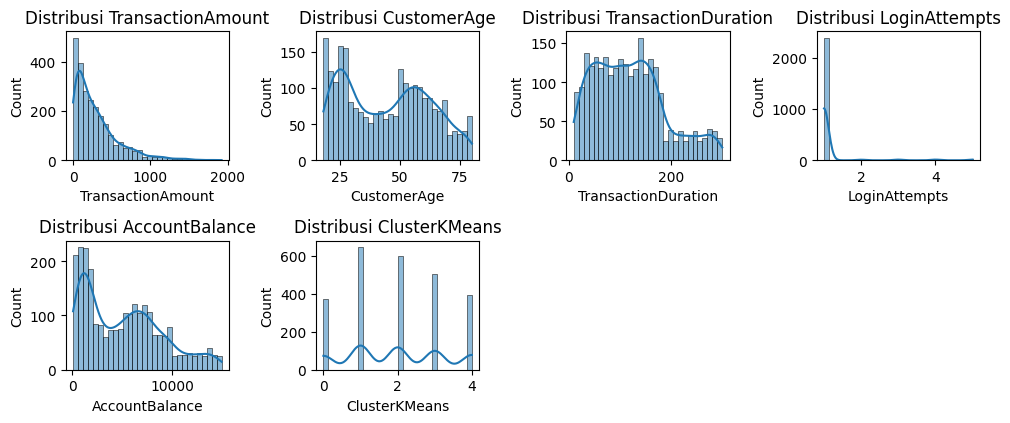

In [64]:
# Distribusi Fitur Numerik
fitur_numerik = data.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(10, 6))
for i, column in enumerate(fitur_numerik.columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(data[column], bins=30, kde=True)
  plt.title(f"Distribusi {column}")

plt.tight_layout()
plt.show()

<ipython-input-65-ae41e41e1da5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")
<ipython-input-65-ae41e41e1da5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")
<ipython-input-65-ae41e41e1da5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette="viridis")
<ipython-input-65-ae41e41e1da5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fals

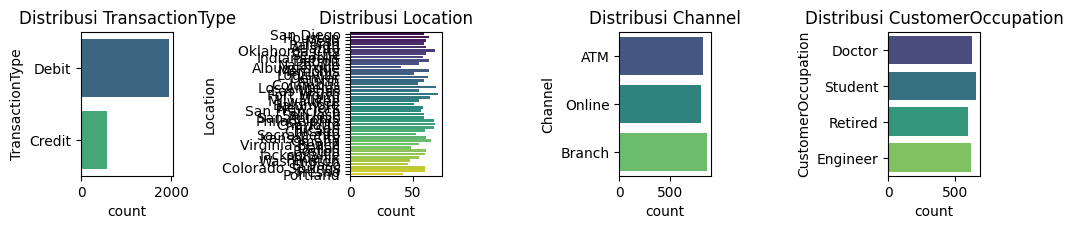

In [65]:
# Distribusi Fitur Kategorik
fitur_kategorik = data.select_dtypes(include=["object"])
plt.figure(figsize=(10, 6))
for i, column in enumerate(fitur_kategorik.columns, 1):
  plt.subplot(3, 4, i)
  sns.countplot(y=data[column], palette="viridis")
  plt.title(f"Distribusi {column}")

plt.tight_layout()
plt.show()

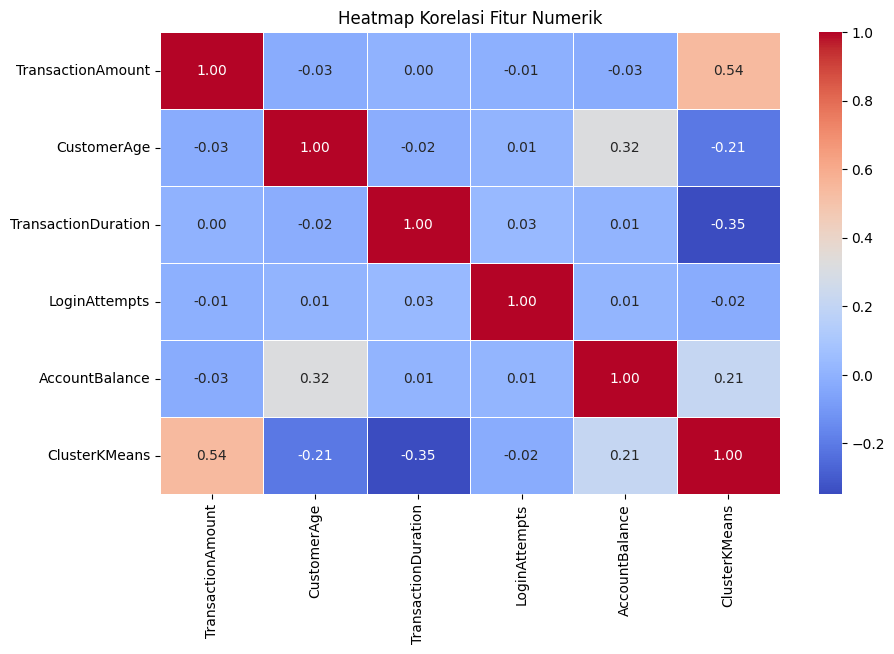

In [66]:
# Heatmap Korelasi Fitur Numerik
plt.figure(figsize=(10, 6))
corr_matrix = fitur_numerik.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

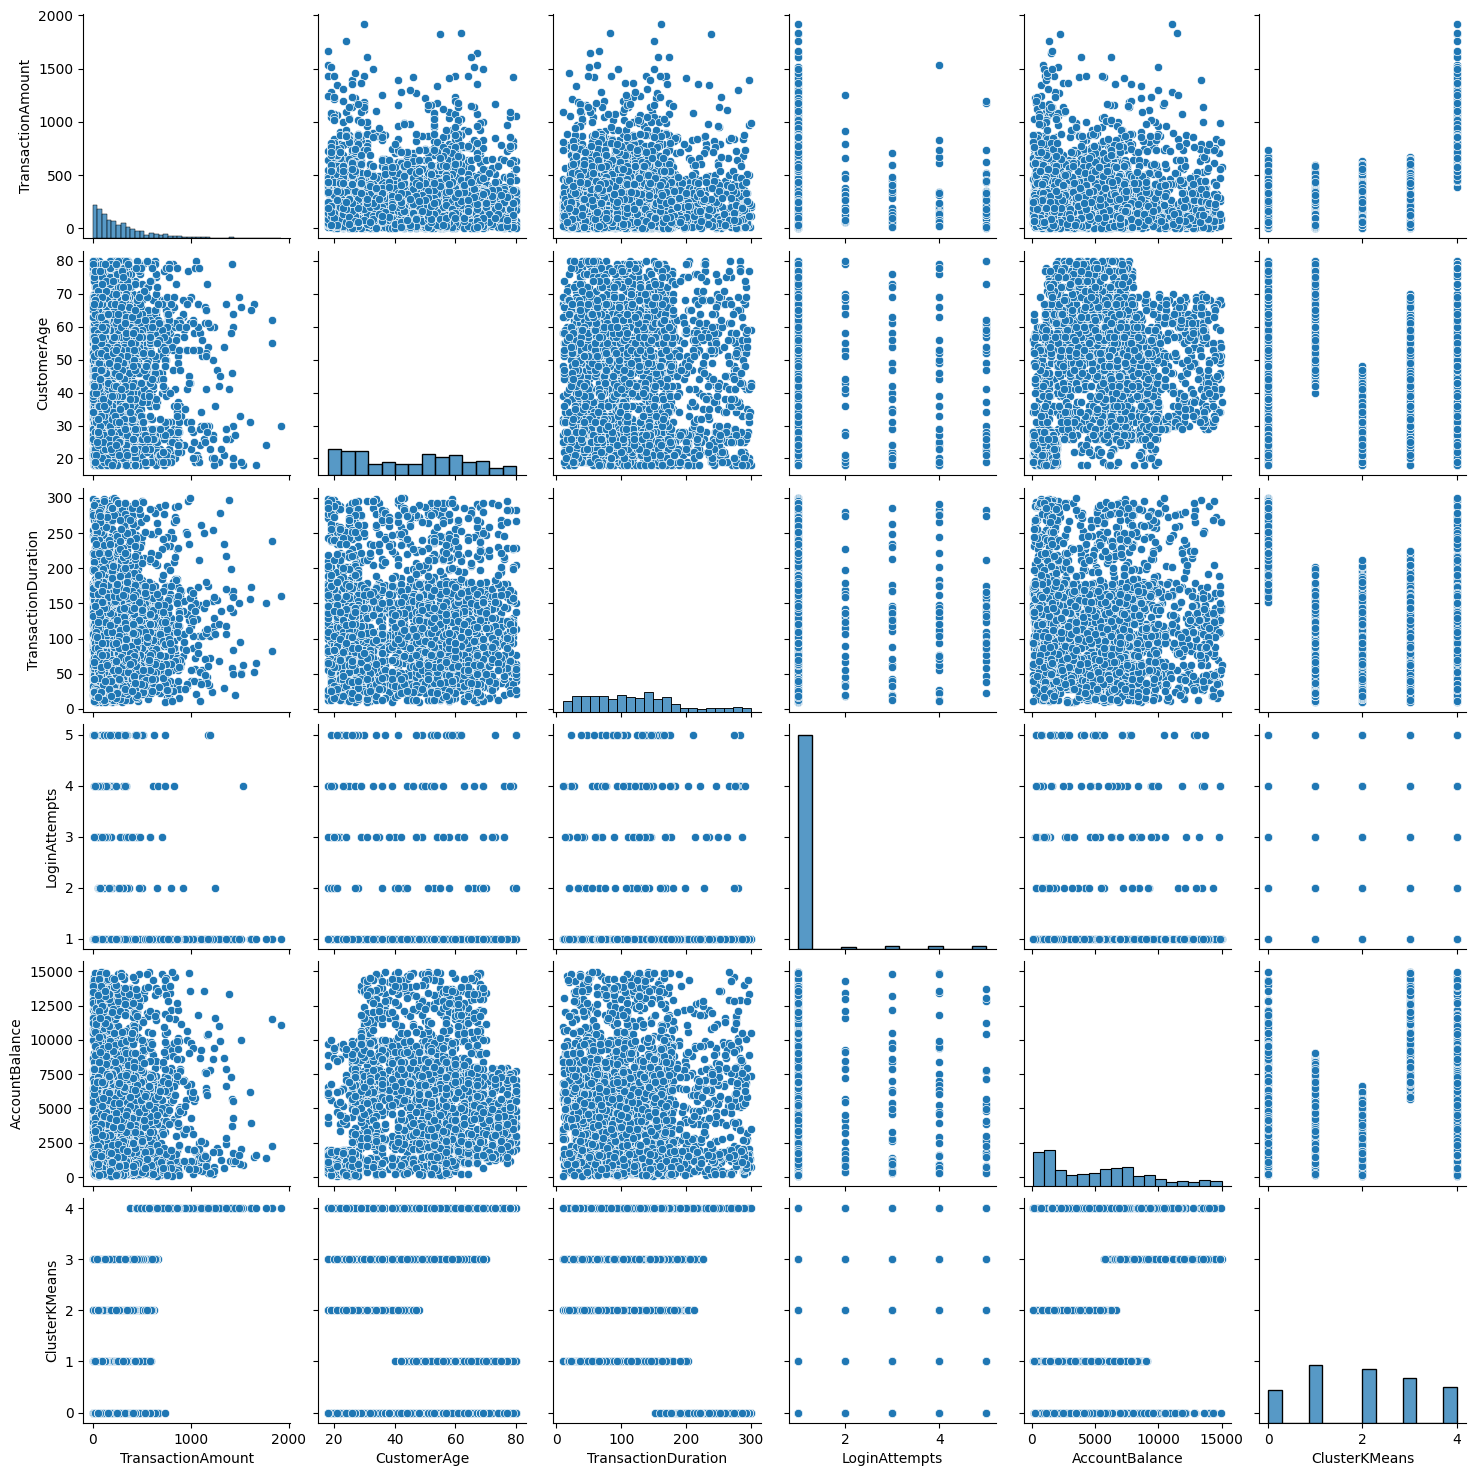

In [67]:
# Pairplot Fitur Numerik
sns.pairplot(fitur_numerik)
plt.show()

<ipython-input-68-a512641f183b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ClusterKMeans", data=data, palette="viridis")


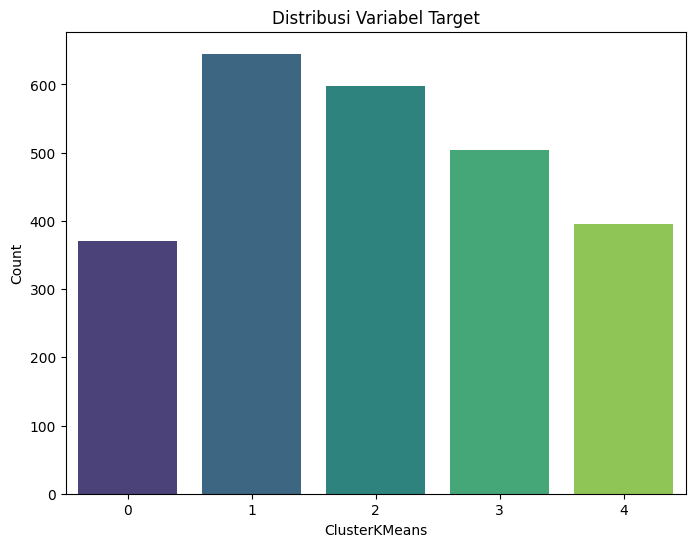

In [68]:
# Visualisasi Distribusi Variabel Target (ClusterKMeans)
plt.figure(figsize=(8, 6))
sns.countplot(x="ClusterKMeans", data=data, palette="viridis")
plt.title("Distribusi Variabel Target")
plt.xlabel("ClusterKMeans")
plt.ylabel("Count")
plt.show()

**Encoding Label Encoder Kolom Kategorik**

In [69]:
# Memuat List Kolom Kategorik yang perlu diencode
kolom_kategorik = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Encode Kolom Kategorikal
for column in kolom_kategorik:
  data[column] = label_encoder.fit_transform(data[column])

# Menampilkan DataFrame Hasil Encoding
data.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,ClusterKMeans
0,14.09,1,36,0,70,0,81,1,5112.21,1
1,376.24,1,15,0,68,0,141,1,13758.91,3
2,126.29,1,23,2,19,3,56,1,1122.35,2
3,184.50,1,33,2,26,3,25,1,8569.06,3
4,13.45,0,1,2,26,3,198,1,7429.40,0


**Normalisasi Data Kolom Numerik**

In [70]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Memuat List Kolom Numerik yang akan dinormalisasi
kolom_numerik = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]

# Normalisasi Seluruh Kolom Numerik
data[kolom_numerik] = scaler.fit_transform(data[kolom_numerik])

# Menampilkan DataFrame Setelah Normalisasi
data.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,ClusterKMeans
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832,1
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055,3
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637,2
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198,3
4,0.006874,0,1,2,0.129032,3,0.648276,0.0,0.492591,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [71]:
# Memisahkan Fitur (X) dan Target (y)
X = data.drop(columns=["ClusterKMeans"])
y = data["ClusterKMeans"]

# Split Data Menjadi Data Latih dan Data Uji dengan 80% Data Latih dan 20% Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan Bentuk Data Latih dan Data Uji untuk Memastikan Split
print("Data Latih: ", X_train.shape, y_train.shape)
print("Data Uji: ", X_test.shape, y_test.shape)

Data Latih:  (2009, 9) (2009,)
Data Uji:  (503, 9) (503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [72]:
# Melatih Model Setiap Klasifikasi secara Terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model Training Klasifikasi Selesai")

Model Training Klasifikasi Selesai


In [73]:
# Mengevaluasi dan Mengembalikan Hasil sebagai Kamus
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  # Mengecek Bentuk Confusion Matrix
  if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
  else:
    # Menangani Confusion Matrix Multiclass
    tn, fp, fn, tp = 0, 0, 0, 0
    for i in range(cm.shape[0]):
      tp += cm[i, i]
      fn += sum(cm[i, :]) - cm[i, i]
      fp += sum(cm[:, i]) - cm[i, i]
      tn += cm.sum() - (tp + fn + fp)

  results = {
      "Confusion Matrix": cm,
      "True Positive": tp,
      "True Negative": tn,
      "False Positive": fp,
      "False Negative": fn,
      "Accuracy": accuracy_score(y_test, y_pred),
      "Precision": precision_score(y_test, y_pred, average="macro"),
      "Recall": recall_score(y_test, y_pred, average="macro"),
      "F1-Score": f1_score(y_test, y_pred, average="macro")
  }
  return results

# Mengevaluasi Setiap Model Menggunakan Data Uji
results = {
      "K-Nearest Neighbors": evaluate_model(knn, X_test, y_test),
      "Decision Tree": evaluate_model(dt, X_test, y_test),
      "Random Forest": evaluate_model(rf, X_test, y_test),
      "Support Vector Machine": evaluate_model(svm, X_test, y_test),
      "Naive Bayes": evaluate_model(nb, X_test, y_test)
}

# Membuat DataFrame untuk Menampilkan Hasil
summary_data = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Mengisi DataFrame dengan Hasil
rows = []
for model_name, metrics in results.items():
  rows.append({
      "Model": model_name,
      "Accuracy": metrics["Accuracy"],
      "Precision": metrics["Precision"],
      "Recall": metrics["Recall"],
      "F1-Score": metrics["F1-Score"]
  })

# Mengonversi Kamus ke DataFrame
summary_data = pd.DataFrame(rows)

# Menampilkan Hasil DataFrame
print(summary_data)

                    Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors  0.558648   0.493651  0.517513  0.483946
1           Decision Tree  0.950298   0.950489  0.947887  0.948911
2           Random Forest  0.944334   0.942967  0.941297  0.941829
3  Support Vector Machine  0.526839   0.317978  0.471714  0.379270
4             Naive Bayes  0.894632   0.901372  0.888490  0.892539


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

**Penjelasan Algoritma Klasifikasi yang Digunakan:**
1. **K-Nearest Neighbors**: Mengklasifikasikan data baru berdasarkan kedekatannya dengan data lain yang sudah diberi label dalam dataset pelatihan dimana data baru diklasifikasikan ke dalam kelas yang paling umum di antara tetangga terdekat. KNN sangat sederhana tetapi efektif terutama ketika data memiliki pola yang jelas.
2. **Decision Tree**: Menggunakan struktur pohon untuk membuat keputusan klasifikasi dimana setiap akar mewakili seluruh dataset dan menjadi titik awal untuk pemisahan data, setiap cabang pohon mewakili keputusan atau percabangan yang diambil dari data pada fitur-fitur tertentu, dan setiap daun mewakili keputusan atau prediksi hasil akhir dari proses.
3. **Random Forest**: Versi lanjutan dari Decision Tree yang menggunakan banyak pohon keputusan untuk meningkatkan akurasi prediksi dengan menggabungkan hasil beberapa pohon keputusan yang dibangun dari sampel acak dataset sehingga mengurangi risiko overfitting dan memberikan hasil akurasi yang lebih stabil.
4. **Support Vector Machine**: Algoritma yang mencoba menemukan garis atau bidang (hyperplane) optimal yang memisahkan data ke dalam kelas yang berbeda dengan margin paling besar dimana sangat efektif untuk data yang terpisah dengan jelas dan dapat digunakan untuk klasifikasi biner ataupun multikelas.
5. **Naive Bayes**: Algoritma berbasis probabilistik yang didasarkan pada Teorema Bayes untuk memprediksi kelas dari data baru berdasarkan pengamatan fitur yang ada dimana mengasumsikan seluruh fitur dalam data besifat independen antara satu sama lain meskipun pada nyatanya hal tersebut jarang terjadi. Pada dasarnya asumsi sederhana tersebut dalam praktiknya sering kali cukup kuat untuk memberikan hasil yang baik terutama dalam klasifikasi teks.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Confusion Matrix: 
[[28 22 15 16  1]
 [ 6 99  1 15  5]
 [ 7  9 87  8  2]
 [10 14  8 63  3]
 [14 32 18 16  4]]
Accuracy:  0.558648111332008
Precision:  0.4936505614343612
Recall:  0.5175130790498802
F1-Score:  0.48394623972589057

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.34      0.38        82
           1       0.56      0.79      0.66       126
           2       0.67      0.77      0.72       113
           3       0.53      0.64      0.58        98
           4       0.27      0.05      0.08        84

    accuracy                           0.56       503
   macro avg       0.49      0.52      0.48       503
weighted avg       0.51      0.56      0.52       503



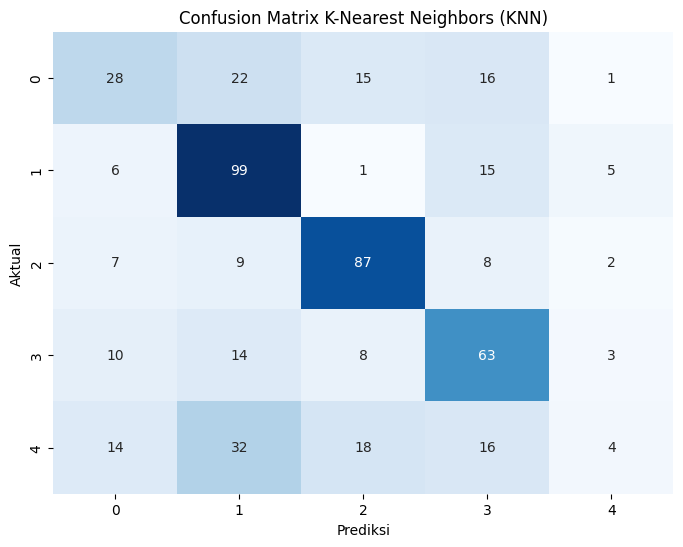

In [74]:
# K-Nearest Neighbors
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan Confusion Matrix
print("Confusion Matrix: ")
print(cm_knn)

# Menghitung Akurasi Keseluruhan
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy: ", accuracy)

# Menghitung Presisi, Recall, dan F1-Score per Kelas
precision = precision_score(y_test, y_pred_knn, average="macro")
recall = recall_score(y_test, y_pred_knn, average="macro")
f1 = f1_score(y_test, y_pred_knn, average="macro")

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Menampilkan Heatmap Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix K-Nearest Neighbors (KNN)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Confusion Matrix: 
[[ 75   1   3   0   3]
 [  0 123   0   3   0]
 [  1   1 108   1   2]
 [  1   4   1  91   1]
 [  0   0   1   2  81]]
Accuracy:  0.9502982107355865
Precision:  0.9504890742327813
Recall:  0.9478867955556927
F1-Score:  0.9489112151086763

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        82
           1       0.95      0.98      0.96       126
           2       0.96      0.96      0.96       113
           3       0.94      0.93      0.93        98
           4       0.93      0.96      0.95        84

    accuracy                           0.95       503
   macro avg       0.95      0.95      0.95       503
weighted avg       0.95      0.95      0.95       503



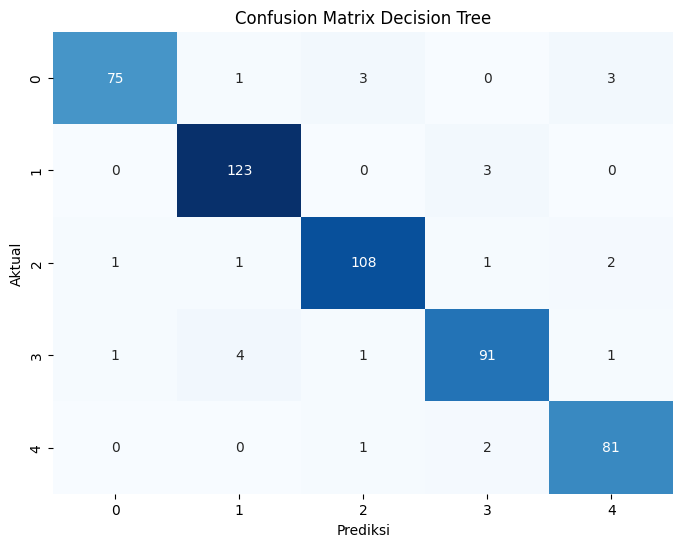

In [75]:
# Decision Tree
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan Confusion Matrix
print("Confusion Matrix: ")
print(cm_dt)

# Menghitung Akurasi Keseluruhan
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy: ", accuracy)

# Menghitung Presisi, Recall, dan F1-Score per Kelas
precision = precision_score(y_test, y_pred_dt, average="macro")
recall = recall_score(y_test, y_pred_dt, average="macro")
f1 = f1_score(y_test, y_pred_dt, average="macro")

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Menampilkan Heatmap Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Decision Tree")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Confusion Matrix: 
[[ 74   2   1   1   4]
 [  1 123   0   1   1]
 [  2   2 107   1   1]
 [  1   3   1  91   2]
 [  0   0   1   3  80]]
Accuracy:  0.9443339960238568
Precision:  0.9429668613173767
Recall:  0.9412969072800715
F1-Score:  0.9418289294156498

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        82
           1       0.95      0.98      0.96       126
           2       0.97      0.95      0.96       113
           3       0.94      0.93      0.93        98
           4       0.91      0.95      0.93        84

    accuracy                           0.94       503
   macro avg       0.94      0.94      0.94       503
weighted avg       0.94      0.94      0.94       503



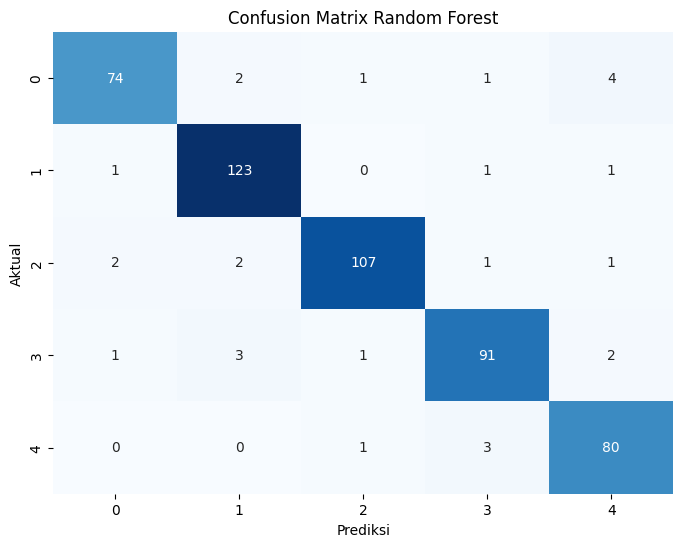

In [76]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan Confusion Matrix
print("Confusion Matrix: ")
print(cm_rf)

# Menghitung Akurasi Keseluruhan
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy: ", accuracy)

# Menghitung Presisi, Recall, dan F1-Score per Kelas
precision = precision_score(y_test, y_pred_rf, average="macro")
recall = recall_score(y_test, y_pred_rf, average="macro")
f1 = f1_score(y_test, y_pred_rf, average="macro")

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Menampilkan Heatmap Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Confusion Matrix: 
[[  0  33  24  25   0]
 [  0 101  10  15   0]
 [  0  19  86   8   0]
 [  0  14   6  78   0]
 [  0  35  24  25   0]]
Accuracy:  0.5268389662027833
Precision:  0.31797792494481236
Recall:  0.471713523167379
F1-Score:  0.3792704156140467

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.50      0.80      0.62       126
           2       0.57      0.76      0.65       113
           3       0.52      0.80      0.63        98
           4       0.00      0.00      0.00        84

    accuracy                           0.53       503
   macro avg       0.32      0.47      0.38       503
weighted avg       0.35      0.53      0.42       503



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

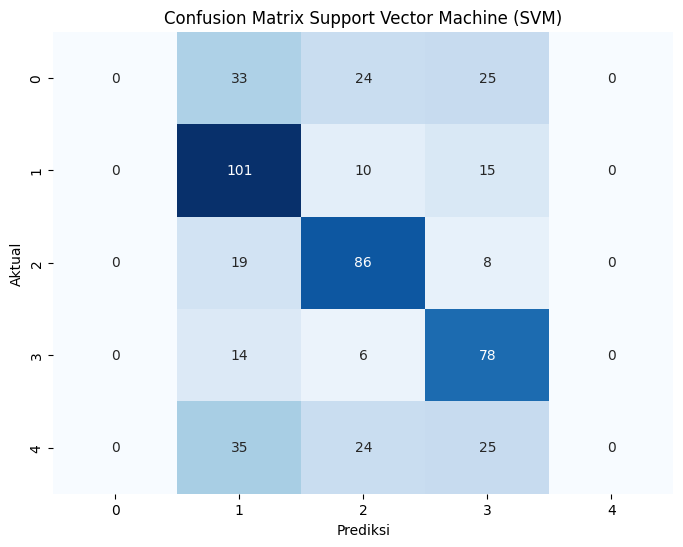

In [77]:
# Support Vector Machine
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan Confusion Matrix
print("Confusion Matrix: ")
print(cm_svm)

# Menghitung Akurasi Keseluruhan
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy: ", accuracy)

# Menghitung Presisi, Recall, dan F1-Score per Kelas
precision = precision_score(y_test, y_pred_svm, average="macro")
recall = recall_score(y_test, y_pred_svm, average="macro")
f1 = f1_score(y_test, y_pred_svm, average="macro")

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Menampilkan Heatmap Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Support Vector Machine (SVM)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Confusion Matrix: 
[[ 66   4   6   5   1]
 [  0 119   0   7   0]
 [  2   4 101   6   0]
 [  1   2   1  90   4]
 [  0   1   4   5  74]]
Accuracy:  0.8946322067594433
Precision:  0.9013722213102817
Recall:  0.8884895061701205
F1-Score:  0.8925386984102639

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87        82
           1       0.92      0.94      0.93       126
           2       0.90      0.89      0.90       113
           3       0.80      0.92      0.85        98
           4       0.94      0.88      0.91        84

    accuracy                           0.89       503
   macro avg       0.90      0.89      0.89       503
weighted avg       0.90      0.89      0.89       503



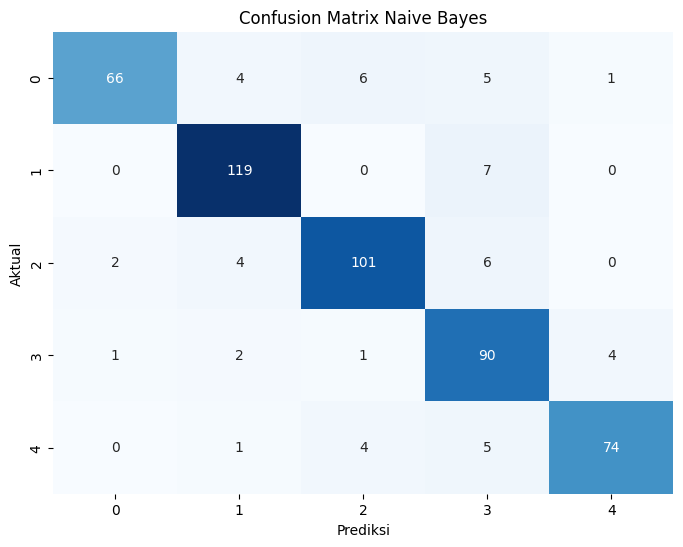

In [78]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan Confusion Matrix
print("Confusion Matrix: ")
print(cm_nb)

# Menghitung Akurasi Keseluruhan
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy: ", accuracy)

# Menghitung Presisi, Recall, dan F1-Score per Kelas
precision = precision_score(y_test, y_pred_nb, average="macro")
recall = recall_score(y_test, y_pred_nb, average="macro")
f1 = f1_score(y_test, y_pred_nb, average="macro")

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Menampilkan Heatmap Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

**Rangkuman Hasil**

In [79]:
# Fungsi untuk Mengevaluasi dan Mengembalikan Hasil sebagai Kamus
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  # Mengecek Bentuk Confusion Matrix
  if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
  else:
    # Menangani Confusion Matrix Multiclass
    tn, fp, fn, tp = 0, 0, 0, 0
    for i in range(cm.shape[0]):
      tp += cm[i ,i]
      fn += sum(cm[i, :]) - cm[i, i]
      fp += sum(cm[:, i ]) - cm[i, i]
      tn += cm.sum() - (tp + fn + fp)

  results = {
      "Confusion Matrix": cm,
      "True Positive": tp,
      "True Negative": tn,
      "False Positive": fp,
      "False Negative": fn,
      "Accuracy": accuracy_score(y_test, y_pred),
      "Precision": precision_score(y_test, y_pred, average="macro"),
      "Recall": recall_score(y_test, y_pred, average="macro"),
      "F1-Score": f1_score(y_test, y_pred, average="macro")
  }
  return results

# Mengevaluasi Setiap Model dan Mengumpulkan Hasil
results = {
    "K-Nearest Neighbors": evaluate_model(knn, X_test, y_test),
    "Decision Tree": evaluate_model(dt, X_test, y_test),
    "Random Forest": evaluate_model (rf, X_test, y_test),
    "Support Vector Machine": evaluate_model(svm, X_test, y_test),
    "Naive Bayes": evaluate_model(nb, X_test, y_test)
}

# Membuat DataFrame untuk Merangkum Hasil
summary_data = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Menyesuaikan DataFrame dengan Hasil
rows = []
for model_name, metrics in results.items():
  rows.append({
      "Model": model_name,
      "Accuracy": metrics["Accuracy"],
      "Precision": metrics["Precision"],
      "Recall": metrics["Recall"],
      "F1-Score": metrics["F1-Score"]
  })

# Mengubah List Kamus ke DataFrame
summary_data = pd.DataFrame(rows)

# Menampilkan Rangkuman Hasil DataFrame
print(summary_data)

                    Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors  0.558648   0.493651  0.517513  0.483946
1           Decision Tree  0.950298   0.950489  0.947887  0.948911
2           Random Forest  0.944334   0.942967  0.941297  0.941829
3  Support Vector Machine  0.526839   0.317978  0.471714  0.379270
4             Naive Bayes  0.894632   0.901372  0.888490  0.892539


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Evaluasi Algoritma**

Berdasarkan hasil evaluasi algoritma yang digunakan, model dengan performa terbaik jatuh kepada Decision Tree yang memiliki akurasi tertinggi sebesar 95.03% yang menunjukkan bahwa model dapat mengklasifikasikan data dengan sangat baik. Lalu, terdapat Random Forest yang memiliki akurasi sedikit lebih rendah dari Decision Tree tetapi hasilnya tetap kuat dengan keunggulannya adalah kestabilan karena menggunakan multiple decision trees. Kedua algoritma tersebut memiliki presisi dan recall yangg tinggi sebesar 94.89% dan 94.18% berurutan yang berarti model tidak terlalu banyak memuat kesalahan baik dalam mendeteksi kasus positif maupun negatif. Model dengan performa rendah jatuh kepada Support Vector Machine yang memiliki akurasi sebesar 52.68% dengan presisi dan recall yang rendah sebesar 31.79% dan 47.17% berurutan yang menunjukkan terdapat banyak kesalahan positif maupun negatif. Tidak hanya itu, tetapi juga K-Nearet Neighbors juga termasuk dalam model dengan performa rendah dengan memiliki akurasi sebesar 55.86% yang menandakan model mengalami underfitting dan tidak mampu menangkap pola data dengan baik. Model dengan performa cukup baik merupakan Naive Bayes yang memiliki akurasi sebesar 89.46% dengan F1-Score sebesar 89.25% yang berarti model sudah cukup baik tetapi tidak sebaik Decision Tree dan Random Forest. Naive Bayes dapat menjadi alternatif jika ingin memilih model yang lebih sederhana dan cepat tanpa melakukan banyak tuning.

Maka dari itu, 2 algoritma yang dapat dibandingkan hasilnya adalah Decision Tree dan Random Forest.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Berdasarkan analisis hasil evaluasi yang telah dibuat dengan tidak melakukan tuning:**
2. **Identifikasi Kelemahan Model**  
- Support Vector Machine memiliki presisi yang sangat rendah sebesar 31.79% yang berarti banyak prediksi yang disalahkan sebagai positif atau kesalahan positif. Tidak hanya itu, recall Support Vector Machine juga mendapatkan hasil rendah sebesar 47.17% yang berarti model sering gagal mendeteksi kelas yang sebenarnya atau kesalahan negatif. K-Nearest Neighbors juga memiliki precision dan recall yang kurang baik sebesar 49.36% dan 51.75% berurutan yang berarti model kurang cocok untuk menganalisis dataset ini.
- Untuk bagian apakah model mengalami overfitting dan underfitting, Decision Tree berpotensi mengalami overfitting dikarenakan model sering terlalu menyesuaikan data training dan kurang tergeneralisasi. Untuk Random Forest cenderung lebih stabil dibandingkan Decision Tree dikarenakan banyak menggunakan pohon keputusan sehingga dapat mengurangi overfitting. Support Machine Learning dan K-Nearest Neighbors mengalami underfitting dimana tidak dapat menangkap pola dengan baik sehingga menghasilkan akurasi yang rendah.

3. **Rekomendasi Tindakan Lanjutan**
- Kalau ingin meningkatkan performa lanjutan direkomendasikan menggunakan cross-validation untuk memastikan Decision Tree dan Random Forest tidak mengalami overfitting. Dapat juga melakukan tunning yang tidak saya lakukan pada analisis sebelumnya.
- Kalau ingin memperbaiki model yang buruk seperti Support Vector Machine dan K-Nearest Neighbors dapat menggunakan kernel yang berbeda untuk SVM, melakukan normalisasi atau standarisasi fitur untuk membantu SVM dan KNN bekerja lebih baik lagi, serta dapat juga menggunakan feature selection supaya hanya fitur penting saja yang digunakan dengan menghindari noise.
- Kalau ingin meningkatkan dataset, dapat juga dengan menggunakan teknik feature engineering untuk membuat fitur yang lebih informatif.


**Kesimpulan:** Pada akhirnya algoritma Random Forest yang paling baik dalam menganalisis dataset ini karena hasilnya seimbang dengan tidak overfitting dan tidak underfitting karena menggunakan banyak pohon keputusan dalam analisisnya. Algoritma juga menjadi yang terbaik kedua setelah Random Forest adalah Decision Tree dengan akurasi, presisi, dan recall yang cukup baik walaupun mungkin terindikasi overfitting.